In [3]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Department of Physics, Paris, France

This archive contains the supplemental materials and replication package associated with the preprint, "*Temporal and topological partitioning in real-world growing networks for scale-free properties study*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Temporal and topological partitioning in real-world growing networks for scale-free properties study* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145; also available on SSRN: http://ssrn.com/abstract=5191689

 
# A) Replication Package

[Open target Replication Package notebook](./Replication_Package.ipynb)

# B) Table of Contents

- 0. [QuickStart Guide](./SM00_QuickStart.ipynb)
- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. Growth Relationship Between Nodes and Edges (not provided yet)
- 6. Topological Partitioning ($RV$ Nodes) (not provided yet)
- 7. In-Degree and Out-Degree Distributions Over Time  (not provided yet)
- 8. Distribution Tail Analysis (not provided yet)
- 9. Temporal Partitioning (not provided yet)
- 10. Derived $O-(RV/RL)-O$ Graph Construction (not provided yet)
- 11. Building the $TSL$ Partitioning (not provided yet)
- 12. Barabási–Albert Model Use Case (not provided yet)


**NB :** As of 2025/04/29, only the QuickStart guide, the replication package, SM01, SM02, SM03 and SM04 are available. The Python scripts are also provided under `local_utils` directory, but they are not in their final form and should be considered an alpha release. The graphs used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main dataset $O/RV/RL-O/RV/RL$ (2+ billions of nodes, $\sim4$ billions of edges), and two derived $O-(RV/RL)-O$ graphs ($\sim150$ millions nodes and edges). 

In [1]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   

DisplayCopyrightInfo()


___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



---

# 4 Temporal Information Quality and Main Stats

## a) New Nodes and Edges per month per type over time

In [9]:
# the public repository contains main stat files needed 
Rebuild=True # Rebuild stats 
Fsave=True   # overwrite existing export file if it exists

In [3]:
# Load Data
nodes,edges,nodesad,d,Nnodes,Nedges=LoadAllArray()   
stat={}

Loaded : ./ImportData/nodes_20240310.pkl
Loaded : ./ImportData/edges_20240310.pkl
Loaded : ./ImportData/nodesad_20240310.pkl


In [10]:
# rebuild
if Rebuild:
    # nodes creation over time (per type per month)
    ti=time.time()
    stat=BuildNodesTimeStampHisto(nodes,edges,nodesad,d,stat=stat)
    tf=time.time()
    print("BuildNodesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    print(stat.keys())

BuildNodesTimeStampHisto Elapse  14.0 (s)
dict_keys(['O', 'RL', 'RV'])


In [11]:
if Rebuild:
    # edges creation over time (per type per month)
    ti=time.time()
    nodesad[:d["OindexMax"]+1]=0 # default value for origine nodes set to 0
    stat=BuildEdgesTimeStampHisto(nodes,edges,nodesad,d,stat=stat,Verbose=True)
    tf=time.time()
    print("BuildEdgesTimeStampHisto Elapse ",np.round(tf-ti),"(s)")
    print(stat.keys())


edgesTSM 1/2  24.0 (s)
edgesTSM 2/2  81.0 (s)
edgestype 1/1  7.0 (s)
TSM2stat 1/1  11.0 (s)
BuildEdgesTimeStampHisto Elapse  123.0 (s)
dict_keys(['O', 'RL', 'RV', 'O>O', 'O>RL', 'O>RV', 'RL>O', 'RL>RL', 'RL>RV', 'RV>O', 'RV>RL', 'RV>RV'])


In [14]:
#saving Raw Data
if Fsave:
    print("! Overwrite file if it exists")
    filepath=exportpath+"stat_nodes_edges_1970_2030_20240517.pkl"
    pickle.dump(stat,open(filepath,"wb"))
    print("Save file ",filepath)

! Overwrite file if it exists
Save file  ./ExportData/stat_nodes_edges_1970_2030_20240517.pkl


Displaying all curves on the same plot (Generic Plot)


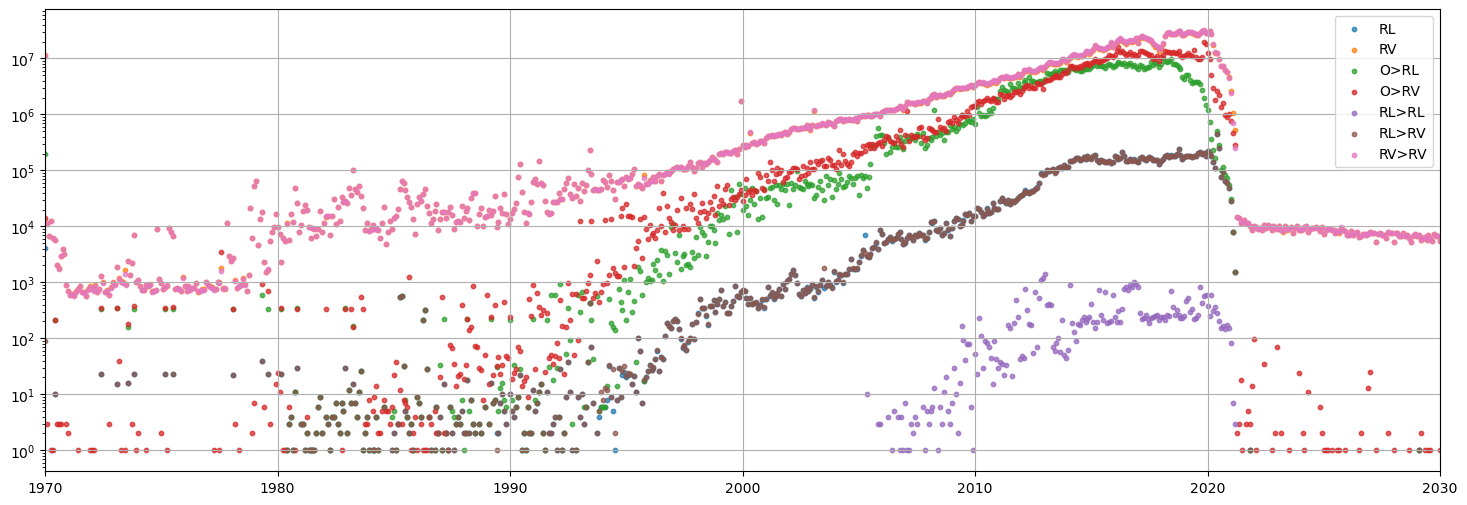

In [15]:
# displaying all new nodes and edges per month per type
filepath=exportpath+"stat_nodes_edges_1970_2030_20240517.pkl"
stat=pickle.load(open(filepath,"rb"))
x=np.arange(1634)/12+1970
print("Displaying all curves on the same plot (Generic Plot)")
plt.figure(figsize=(18,6))
for key,value in stat.items():
    if np.sum(value[1:-1])!=0:
        plt.scatter(x,value,s=10,label=key,alpha=0.75)
plt.yscale('log')
plt.xlim(1970,2030)
plt.grid()
plt.legend()
plt.show()

### In the scope of this study (not generic)

In [18]:
# display curves for edges and nodes in 2 differents figure
# specific to this study
def verticalline(fig,axs):
        #plt.axvline(x=2017,color='k',label="2017/18/19/20/21",alpha=0.5)
        alpha=0.5
        lw=3
        for year in range(2017,2022):
            axs.axvline(x=year,color='k',alpha=alpha,lw=lw)
        axs.axvline(x=2021+(3-1)/12,color='k',linestyle='--',alpha=1,lw=lw)
        for year in [2008,2011,2014]:
            axs.axvline(x=year+(1-1)/12,color='k',linestyle=':',alpha=1,lw=lw)
        
def shiftlabels(fig,axs):
        xticklabels=axs.get_xticklabels()
        for i, label in enumerate(xticklabels):
            if i == 0:  
                label.set_horizontalalignment('left')
            elif i == len(xticklabels) - 1:  
                label.set_horizontalalignment('right')
            else:  
                label.set_horizontalalignment('center')

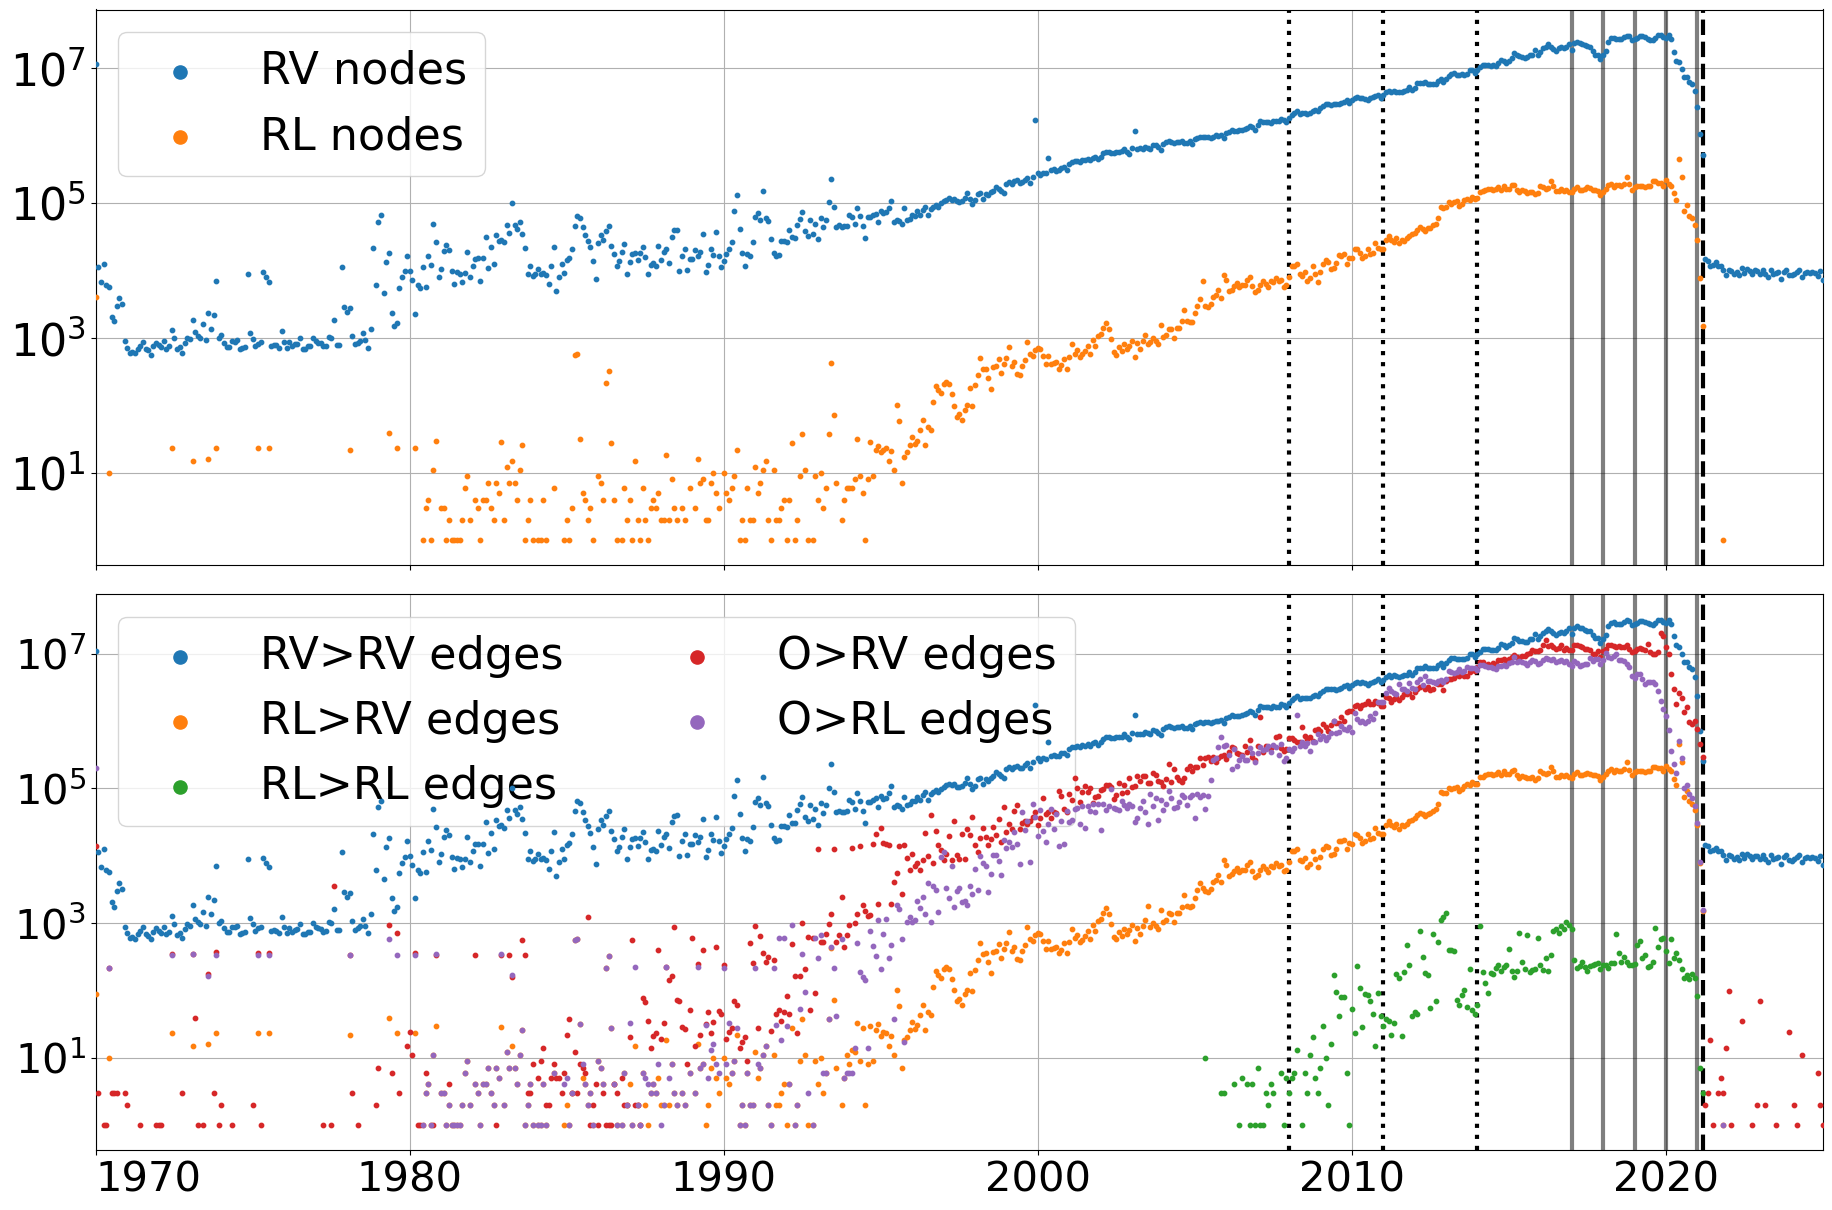

In [19]:
stat=pickle.load(open(exportpath+"stat_nodes_edges_1970_2030_20240517.pkl","rb"))
nfig=2
fontsize=FontSize[nfig]
x=np.arange(1634)/12+1970
fig, axs = plt.subplots(nfig,figsize=(18,6*nfig),sharex=True)   
plt.tight_layout()
for i in range(nfig):
    axs[i].set_xlim(1970,2025)
    axs[i].grid()
    
for sourcetype in sorted(stat.keys())[::-1]:
    if ">" not in sourcetype and np.sum(stat[sourcetype][1:-1])!=0:
        axs[0].scatter(x,stat[sourcetype],s=10,zorder=10,label=sourcetype+" nodes")
axs[0].legend(loc='upper left',fontsize=FontSize[nfig],ncol=1,markerscale=3)
axs[0].set_yscale("log") 
axs[0].tick_params(axis='both',which='major',labelsize=FontSize[nfig])
verticalline(fig,axs[0])

for sourcetype in sorted(stat.keys())[::-1]:
    if ">" in sourcetype and np.sum(stat[sourcetype][1:-1])!=0:
        axs[1].scatter(x,stat[sourcetype],s=10,zorder=10,label=sourcetype+" edges")
axs[1].legend(loc='upper left',fontsize=fontsize,ncol=2,markerscale=3)
axs[1].set_yscale("log") 
axs[1].tick_params(axis='both',which='major',labelsize=fontsize-2)
verticalline(fig,axs[1])
shiftlabels(fig,axs[1])

plt.show()

## b) Timestamp stats and quality issues

The quality of temporal information is an important factor to consider before studying dynamical properties.

In [20]:
# reload 
nodes,edges,nodesad,d,Nnodes,Nedges=LoadAllArray()   

# Exception Timestamp nodes per type
arraytype,encoding=GetNodesTypesArray(nodes,edges,d=d)
DisplayTimestampException(arraytype,encoding,nodesad,f'Nodes')

print(f'_'*80)

# edge source timestamp exception
arraytype,encoding=GetEdgesTypesArray(nodes,edges,d)
arrayTS=GetSourceEdgeTimeStamp(nodes,edges,nodesad,d)
DisplayTimestampException(arraytype,encoding,arrayTS,f'Source Edges')

print(f'_'*80)

# edge target timestamp exception
arraytype,encoding=GetEdgesTypesArray(nodes,edges,d)
arrayTS=GetTargetEdgeTimeStamp(nodes,edges,nodesad,d)
DisplayTimestampException(arraytype,encoding,arrayTS,f'Target Edges')

del nodes,edges,nodesad

Loaded : ./ImportData/nodes_20240310.pkl
Loaded : ./ImportData/edges_20240310.pkl
Loaded : ./ImportData/nodesad_20240310.pkl
Nodes        Timestamp Exceptions O     | Total=    139,524,533 | Zero(1970/1/1)=              0 | Ts(2106/2/7)=    139,524,533
Nodes        Timestamp Exceptions RL    | Total=     17,275,253 | Zero(1970/1/1)=          4,019 | Ts(2106/2/7)=        322,258
Nodes        Timestamp Exceptions RV    | Total=  2,067,579,054 | Zero(1970/1/1)=     11,177,293 | Ts(2106/2/7)=        112,655
________________________________________________________________________________
Source Edges Timestamp Exceptions O>RL  | Total=    687,095,698 | Zero(1970/1/1)=              0 | Ts(2106/2/7)=    687,095,698
Source Edges Timestamp Exceptions O>RV  | Total=  1,017,960,393 | Zero(1970/1/1)=              0 | Ts(2106/2/7)=  1,017,960,393
Source Edges Timestamp Exceptions RL>RL | Total=         41,351 | Zero(1970/1/1)=              0 | Ts(2106/2/7)=             59
Source Edges Timestamp Exc

## c)  Constructing a histogram of timestamp differences for edges

We can specifically analyze the rate of new edge creation (aggregated monthly and by edge type), as a function the creation date of the source node first, followed by the creation date of the target node. Due to the significant variability in the differences observed between the two timestamps associated to edges ($\Delta TS=TS_{source}-TS_{target}$), these differences are represented using a signed logarithmic scale, with values set to 0 for edges where both timestamps are identical, namely $$-\operatorname{sgn}(\Delta TS){\rm Log}_{10}(|\Delta TS|)$$

In [35]:
nodes,edges,nodesad,d,Nnodes,Nedges=LoadAllArray()   

Loaded : ./ImportData/nodes_20240310.pkl
Loaded : ./ImportData/edges_20240310.pkl
Loaded : ./ImportData/nodesad_20240310.pkl


In [36]:
ti=time.time()
sourcearrayTS=GetSourceEdgeTimeStamp(nodes,edges,nodesad,d)
targetarrayTS=GetTargetEdgeTimeStamp(nodes,edges,nodesad,d)
tf=time.time()
print("Edge Source/Target TS Building ",np.round(tf-ti,2),"(s)")
# Edge Source/Target TS Building  62.24 (s)

Edge Source/Target TS Building  63.66 (s)


In [37]:
# we exclude edges where timestamp==0 or timestamp==2**32-1
ti=time.time()
mask=np.logical_and(np.logical_and(sourcearrayTS!=0,sourcearrayTS!=2**32-1),np.logical_and(targetarrayTS!=0,targetarrayTS!=2**32-1))
tf=time.time()
print("Mask Building ",np.round(tf-ti,2),"(s)")
# Mask Building  4.53 (s)

Mask Building  5.55 (s)


In [38]:
valid_edges=np.sum(mask)
print(f'{valid_edges:,} valid edges over a total of {edges.shape[0]:,} i.e. {np.round(valid_edges/edges.shape[0]*100,2)} % of valid edges')

2,124,356,958 valid edges over a total of 3,841,679,043 i.e. 55.3 % of valid edges


**Comment** About 1.7 billion edges are "O>RV" or "O>RL" edges for which source timestamp is not natively defined.

In [39]:
# ! Timestamp are uint32 (must convert to int before diff)
# deltaTS still in second (negative or positive)
ti=time.time()
sourcearrayTS=sourcearrayTS[mask]
targetarrayTS=targetarrayTS[mask]
deltaTS=sourcearrayTS.astype('int')-targetarrayTS.astype('int')
tf=time.time()
print("Building DeltaTS ",np.round(tf-ti,2),"(s)")
# Building DeltaTS  ~10.43 (s)

Building DeltaTS  9.49 (s)


In [40]:
# convert Seconds since EPOCH to Months since EPOCH
ti=time.time()
sourcearrayTS=timestampsarray2yearmonth(sourcearrayTS)
targetarrayTS=timestampsarray2yearmonth(targetarrayTS)
# we use sourcearrayTS and targetarrayTS instead of
# sourcearrayTSL and targetarrayTSM to avoid array duplication.
tf=time.time()
print("Applying Mask ",np.round(tf-ti,2),"(s)")
# Applying Mask  ~23.6 (s)

Applying Mask  20.13 (s)


In [41]:
ti=time.time()
arraytype,encoding=GetEdgesTypesArray(nodes,edges,d)
arraytype=arraytype[mask]
tf=time.time()
print("Building edge type array and applying mask",np.round(tf-ti,2),"(s)")
# Building edge type array and applying mask ~9.07 (s)

Building edge type array and applying mask 9.38 (s)


**Attention**: the function `BuildEdgesTimeStampHisto` is very similar but does not perform exactly the same operations as what we have done here. In our case, we kept a signed value for deltaTS and excluded edges with timestamp exceptions, which is not the case in the `BuildEdgesTimeStampHisto` function.


Start for edge type : RL>RL


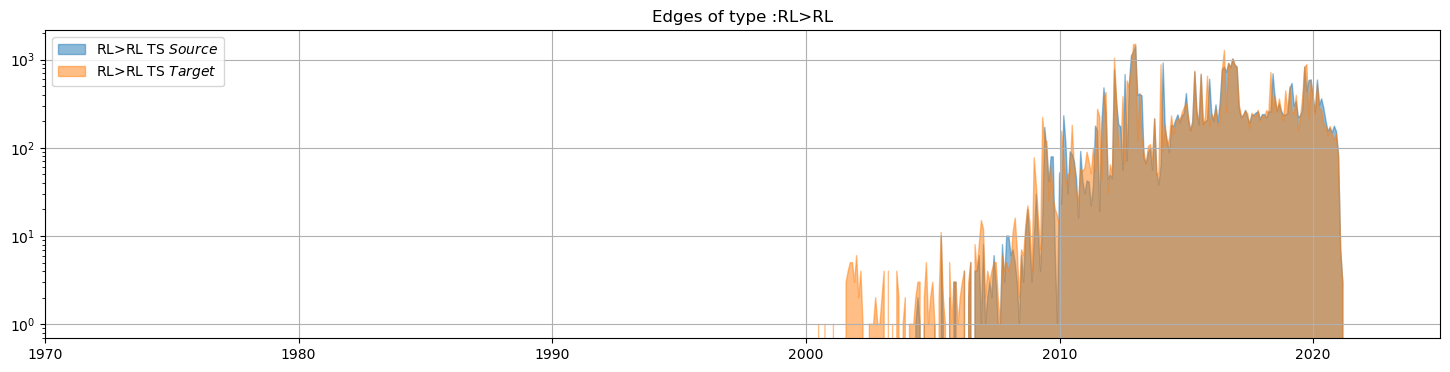

           TS <= -1 Year             121 i.e   0.30 %
-1 Year <  TS <= -1 Week              83 i.e   0.20 %
-1 Week <  TS <= -1 Day               12 i.e   0.03 %
-1 Day  <  TS <= -1 Hour              15 i.e   0.04 %
-1 Hour <  TS <= -1 Mn                44 i.e   0.11 %
-1 Mn   <  TS <= -1 S                 34 i.e   0.08 %
................................................................................
RL>RL     Total TS <  0 S (negative)             309 i.e   0.76 %
................................................................................
RL>RL     ***** TS == 0 S (null)                 814 i.e   2.00 %
................................................................................
RL>RL     Total TS >  0 S (positive)          39,653 i.e  97.25 %
................................................................................
 1 S    <= TS <   1 Mn             2,973 i.e   7.29 %
 1 Mn   <= TS <   1 Hour           4,797 i.e  11.76 %
 1 Hour <= TS <   1 Day            3,586 i.e  

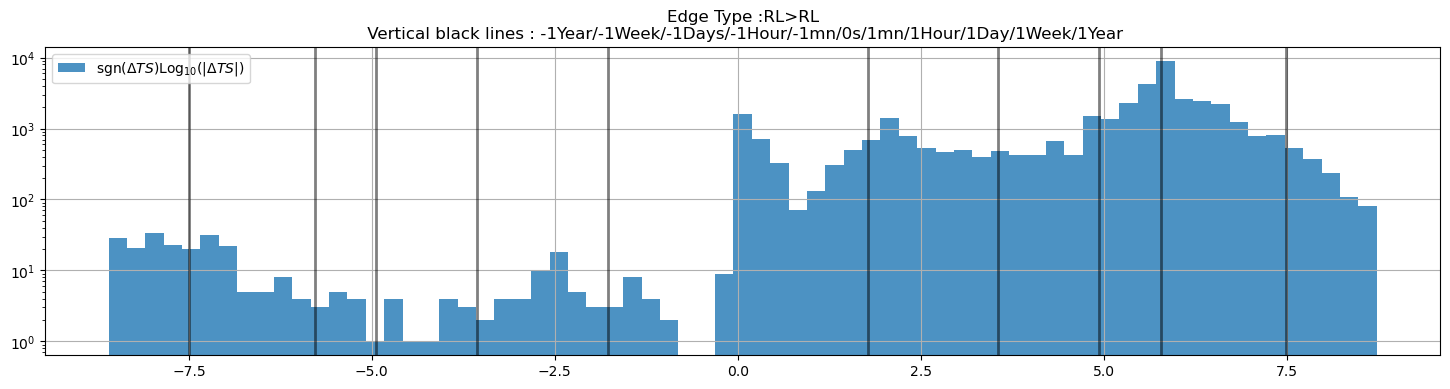

End for edge type : RL>RL
--------------------------------------------------------------------------------
Start for edge type : RL>RV


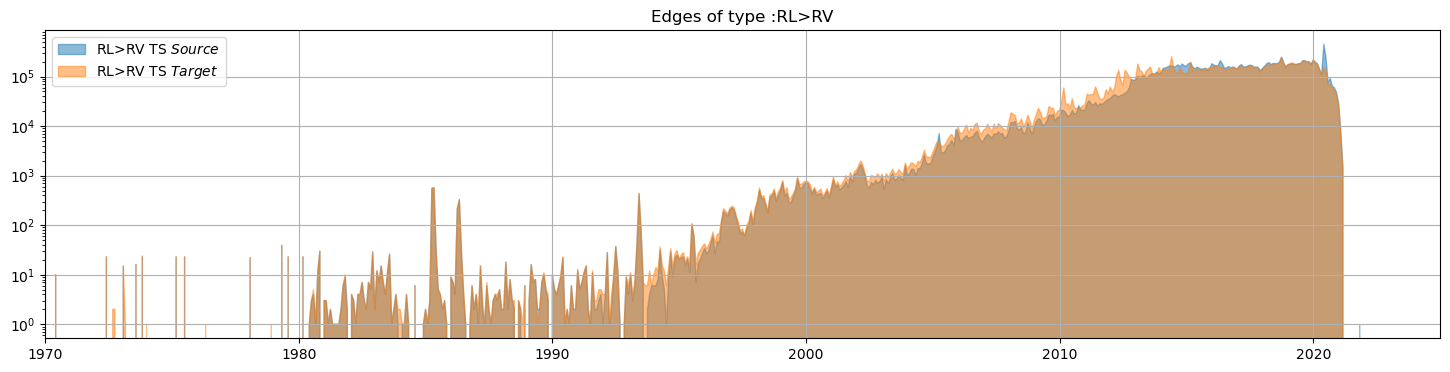

           TS <= -1 Year           9,882 i.e   0.06 %
-1 Year <  TS <= -1 Week           2,155 i.e   0.01 %
-1 Week <  TS <= -1 Day            2,791 i.e   0.02 %
-1 Day  <  TS <= -1 Hour          10,111 i.e   0.06 %
-1 Hour <  TS <= -1 Mn             9,762 i.e   0.06 %
-1 Mn   <  TS <= -1 S              6,381 i.e   0.04 %
................................................................................
RL>RV     Total TS <  0 S (negative)          41,082 i.e   0.24 %
................................................................................
RL>RV     ***** TS == 0 S (null)           3,658,785 i.e  21.65 %
................................................................................
RL>RV     Total TS >  0 S (positive)      13,200,934 i.e  78.11 %
................................................................................
 1 S    <= TS <   1 Mn         3,898,343 i.e  23.07 %
 1 Mn   <= TS <   1 Hour       2,642,198 i.e  15.63 %
 1 Hour <= TS <   1 Day        1,075,008 i.e  

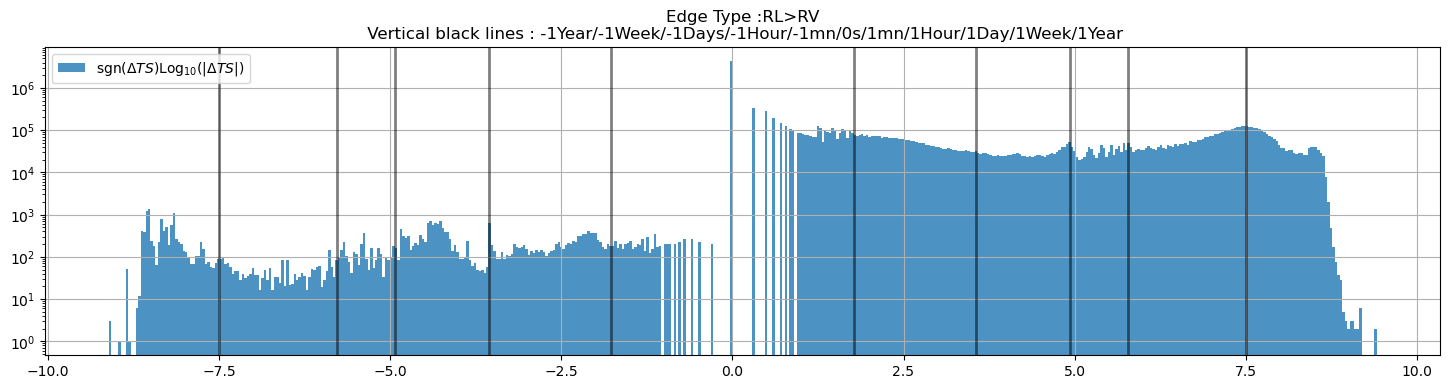

End for edge type : RL>RV
--------------------------------------------------------------------------------
Start for edge type : RV>RV


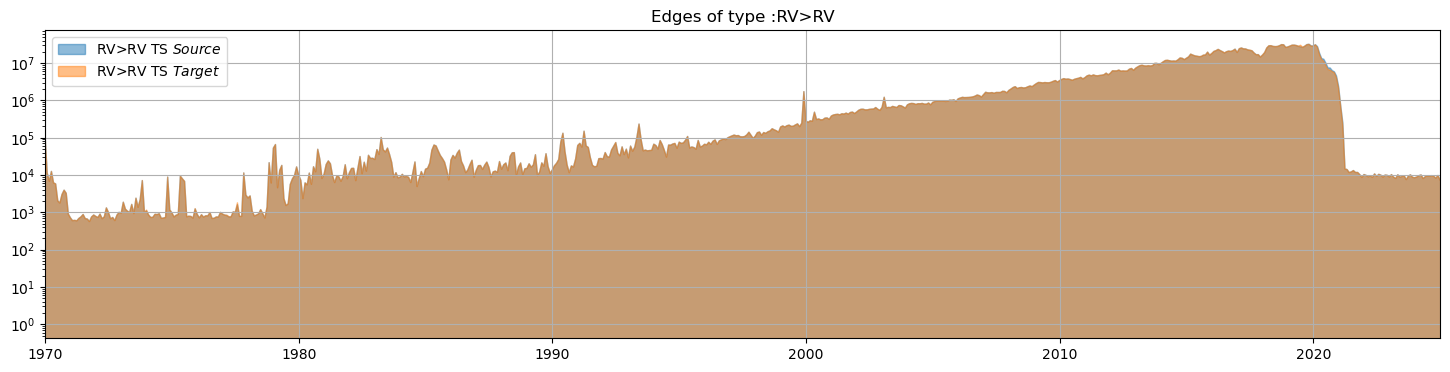

           TS <= -1 Year       1,867,576 i.e   0.09 %
-1 Year <  TS <= -1 Week      11,871,350 i.e   0.56 %
-1 Week <  TS <= -1 Day        7,775,012 i.e   0.37 %
-1 Day  <  TS <= -1 Hour       9,172,363 i.e   0.44 %
-1 Hour <  TS <= -1 Mn         4,303,298 i.e   0.20 %
-1 Mn   <  TS <= -1 S          1,579,316 i.e   0.07 %
................................................................................
RV>RV     Total TS <  0 S (negative)      36,568,915 i.e   1.74 %
................................................................................
RV>RV     ***** TS == 0 S (null)          55,445,678 i.e   2.63 %
................................................................................
RV>RV     Total TS >  0 S (positive)   2,015,400,788 i.e  95.63 %
................................................................................
 1 S    <= TS <   1 Mn       282,614,714 i.e  13.41 %
 1 Mn   <= TS <   1 Hour     840,792,873 i.e  39.90 %
 1 Hour <= TS <   1 Day      485,521,980 i.e  

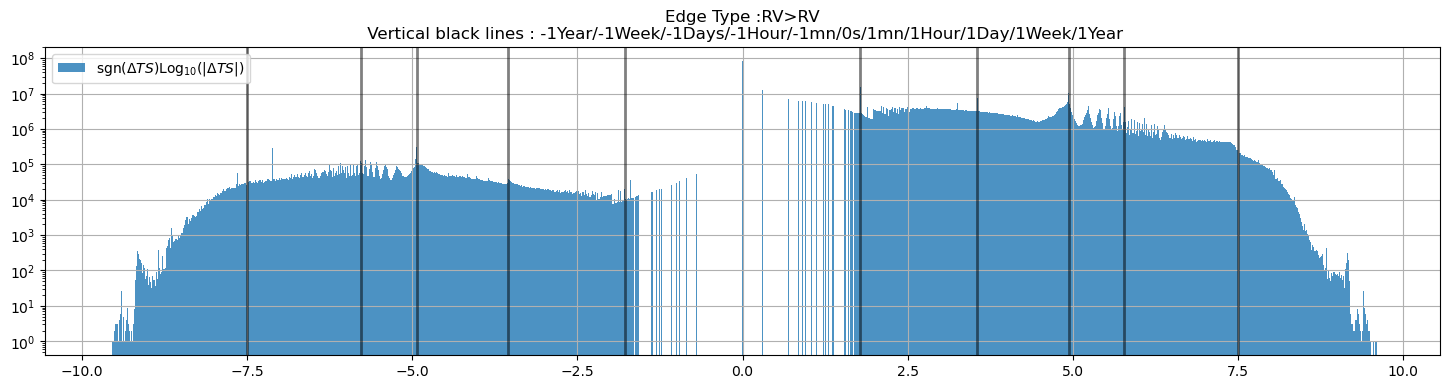

End for edge type : RV>RV
--------------------------------------------------------------------------------


In [48]:
for i,Etype in enumerate(encoding):
    mask_type=arraytype==i
    if np.sum(mask_type)!=0:
        print("-"*80)
        print("Start for edge type :",Etype)
        PlotTSoverTimeEdges(sourcearrayTS,targetarrayTS,mask_type,Etype)
        DisplayTSstat(deltaTS,mask_type,Etype)
        PlotTSHisto(deltaTS,mask_type,Etype)

     

**Comments**: Edges for which the time difference between the date associated with the source node and the date associated with the target node is less than 1 or 2 seconds are unlikely to result from human activity. Instead, they suggest an automated or semi-automated creation process—for example, the simultaneous creation of a Revision node and a Release node.

## d) Advanced Discussion on Temporal Information

### Author date vs Commit date

## Temporal Data Considerations


In this dataset, we have chosen to retain and use the author date rather than the commit date, both of which are available in the raw dataset for revision nodes. The relationship between these two timestamps is non-trivial. The following figure illustrates the dispersion of temporal information at the level of revision nodes, for a randomly selected subset of approximately $3.5~10^6$ revisions and their immediate parents (extracted from the February 13, 2018 export of the Software Heritage project).


![Texte alternatif](./ImportData/Revision_DT_V2.png)

It is noteworthy that the timestamps associated with authors exhibit denser patterns that are more consistent with human activity, typically characterized by differences in full-day intervals. This consideration supports the decision to give precedence to the author date over the commit date whenever the two differ in the present study.

### Temporal Information Consistency and Causality Constraints

Temporal consistency can be assessed through both causality and technological coherence. Causality imposes the following constraint between the dates of a revision node $t_j$ and one of its parents $t_{j'}$:

$$
t^{c}_{j'} < t^{c}_{j} \geq t^{a}_{j}
$$

where `a` and `c` denote the *author date* and the *commit date*, respectively. If this condition is violated, or if $t^{a}_{j} < t^{a}_{j'}$, the associated timestamps may be considered unreliable.

Additional anomalies can be detected by checking for inconsistencies between file extensions and the historical appearance of the corresponding technologies. For instance, `.java` files dated before May 1995 or `.cpp` files before 1983 are implausible and may indicate temporal errors.

The figure below illustrates such inconsistencies by showing the number of file content type nodes over time (logarithmic y-scale), categorized by major file extensions. Colors indicate whether the extensions are temporally coherent. The figure also highlights the proportion of nodes flagged due to:

- implausible extension–timestamp combinations, or  
- violations of revision–parent chronological order.

These indicators help identify revisions requiring closer inspection of their timestamp validity.


![Texte alternatif](./ImportData/File_extension_over_time_wide_V5.png)